4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 10s - loss: 0.0845 - accuracy: 0.6154 - val_loss: 0.0350 - val_accuracy: 0.8245 - 10s/epoch - 20ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0296 - accuracy: 0.8467 - val_loss: 0.0308 - val_accuracy: 0.8408 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0267 - accuracy: 0.8618 - val_loss: 0.0329 - val_accuracy: 0.8391 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0247 - accuracy: 0.8688 - val_loss: 0.0252 - val_accuracy: 0.8560 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0233 - accuracy: 0.8763 - val_loss: 0.0255 - val_accuracy: 0.8605 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0222 - accuracy: 0.8832 - val_loss: 0.0233 - val_accuracy: 0.8698 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0212 - accuracy: 0.8886 - val_loss: 0.0244 - val_accuracy: 0.8663 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0206 - accuracy: 0.8924 - val_loss: 0.0235 - v

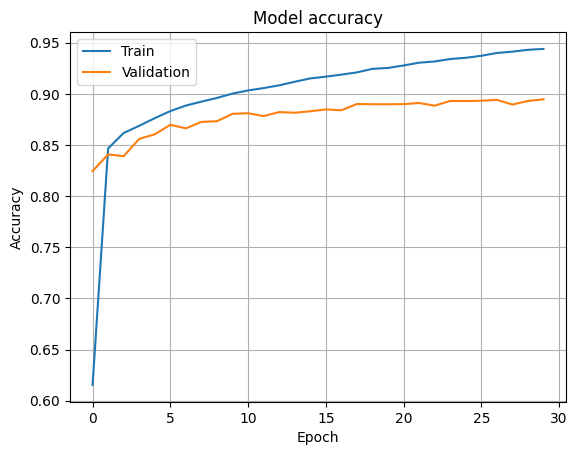

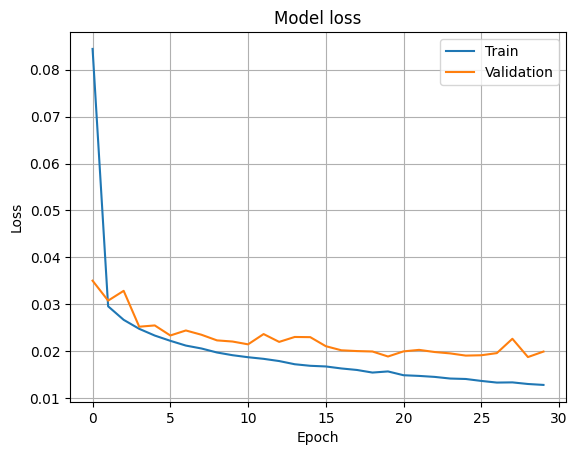

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train=x_train.astype(np.float32)/225.0
x_test=x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test= tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test),verbose=2)

res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은 ", res[1]*100)

import matplotlib.pyplot as plt

#정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

#손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()